In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
os.chdir("drive/MyDrive/Data/")

In [3]:
class_file = pd.read_excel('Classes.xlsx')
classes = class_file['Class']
classes_dir = ['005.Crested_Auklet', '013.Bobolink', '015.Lazuli_Bunting', '023.Brandt_Cormorant', '040.Olive_sided_Flycatcher', '041.Scissor_tailed_Flycatcher', '067.Anna_Hummingbird', '072.Pomarine_Jaeger', '076.Dark_eyed_Junco','081.Pied_Kingfisher', '082.Ringed_Kingfisher', '086.Pacific_Loon', '099.Ovenbird', '104.American_Pipit', '127.Savannah_Sparrow', '135.Bank_Swallow', '141.Artic_Tern', '149.Brown_Thrasher', '156.White_eyed_Vireo', '168.Kentucky_Warbler']
data_root = "/content/drive/MyDrive/Data/images/"

Randomly select 0.7ni images from each folder as your training set, 0.15ni
as validation set, and the rest as your test set, where ni is the number of
images in folder i and dxe is the ceiling of x.

In [4]:
import shutil

def train_test_split():
    root_dir = 'output_images'
    processed_dir = 'images'

    val_ratio = 0.15
    test_ratio = 0.15

    for cls in classes_dir:
        print("Class Name " + cls )
        src = processed_dir +"//" + cls  # Folder to copy images from

        allFileNames = os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                                  [int(len(allFileNames) * (1 - (val_ratio + test_ratio))),
                                                                   int(len(allFileNames) * (1 - val_ratio)),
                                                                   ])
        train_FileNames = [src + '//' + name for name in train_FileNames.tolist()]
        val_FileNames = [src + '//' + name for name in val_FileNames.tolist()]
        test_FileNames = [src + '//' + name for name in test_FileNames.tolist()]

        print('Total images: '+ str(len(allFileNames)))
        print('Training: '+ str(len(train_FileNames)))
        print('Validation: '+  str(len(val_FileNames)))
        print('Testing: '+ str(len(test_FileNames)))
        print('-'*35)

        # # Creating Train / Val / Test folders (One time use)
        os.makedirs(root_dir + '/train//' + cls)
        os.makedirs(root_dir + '/val//' + cls)
        os.makedirs(root_dir + '/test//' + cls)

        # Copy-pasting images
        for name in train_FileNames:
            shutil.copy(name, root_dir + '/train//' + cls)

        for name in val_FileNames:
            shutil.copy(name, root_dir + '/val//' + cls)

        for name in test_FileNames:
            shutil.copy(name, root_dir + '/test//' + cls)



In [ ]:
train_test_split()

Class Name 005.Crested_Auklet
Total images: 44
Training: 30
Validation: 7
Testing: 7
-----------------------------------
Class Name 013.Bobolink
Total images: 60
Training: 42
Validation: 9
Testing: 9
-----------------------------------
Class Name 015.Lazuli_Bunting
Total images: 58
Training: 40
Validation: 9
Testing: 9
-----------------------------------
Class Name 023.Brandt_Cormorant
Total images: 59
Training: 41
Validation: 9
Testing: 9
-----------------------------------
Class Name 040.Olive_sided_Flycatcher
Total images: 60
Training: 42
Validation: 9
Testing: 9
-----------------------------------
Class Name 041.Scissor_tailed_Flycatcher
Total images: 60
Training: 42
Validation: 9
Testing: 9
-----------------------------------
Class Name 067.Anna_Hummingbird
Total images: 60
Training: 42
Validation: 9
Testing: 9
-----------------------------------
Class Name 072.Pomarine_Jaeger
Total images: 60
Training: 42
Validation: 9
Testing: 9
-----------------------------------
Class Name 076

In order for all the images to have the same size, zero-pad or resize the images
in your dataset.

In [5]:
train_data = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Data/output_images/train/',
    labels='inferred',
    label_mode='categorical',
    batch_size=5,
    image_size=(224, 224))
val_data = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Data/output_images/val/',
    labels='inferred',
    label_mode='categorical',
    batch_size=5,
    image_size=(224, 224))
test_data = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Data/output_images/test/',
    labels='inferred',
    label_mode='categorical',
    batch_size=5,
    image_size=(224, 224))

#model = keras.applications.Xception(weights=None, input_shape=(224, 224, 3), classes=20)

Found 820 files belonging to 20 classes.
Found 178 files belonging to 20 classes.
Found 178 files belonging to 20 classes.


In [44]:
train_ds_labels=[]
for images, labels in train_data.unbatch():
    train_ds_labels.append(labels) # or labels.numpy().argmax() for int labels

test_ds_labels=[]
for images, labels in test_data.unbatch():
    test_ds_labels.append(labels) # or labels.numpy().argmax() for int labels

#train_ds_labels

In [ ]:
#train_data = train_ds.map(lambda x, y: (x, tf.one_hot(classes, depth=20)))
#val_data = validation_ds.map(lambda x, y: (x, tf.one_hot(classes, depth=20)))

**Model: Efficientnetb0**

In [64]:
from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
from keras.layers.pooling.global_max_pooling2d import GlobalMaxPooling2D
from tensorflow import keras
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import activations
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.layers import Dense, Dropout, Flatten
tf.get_logger().setLevel('ERROR')


def model_efficientnetb0():
  num_classes = 20
  image_size = 224
  inputs = layers.Input(shape=(image_size, image_size, 3))
  img_augmentation = Sequential(
        [
            layers.RandomZoom(0.3),
            layers.RandomCrop(height= 50, width= 50),
            layers.RandomRotation(factor=0.15),
            layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
            layers.RandomFlip(),
            layers.RandomContrast(factor=0.1),
        ],
        name="img_augmentation",
    )
  x = img_augmentation(inputs)
  #freeze the top layers
  model = EfficientNetB0(include_top=False, input_tensor=x, weights= 'imagenet')
  model.trainable = False

  model_effnet = Sequential()
  model_effnet.add(model)
  model_effnet.add(keras.layers.BatchNormalization())
  model_effnet.add(keras.layers.Activation(activations.relu))
  model_effnet.add(GlobalMaxPooling2D())
  model_effnet.add(Dropout(0.2))
  model_effnet.add(Dense(num_classes, activation= 'softmax'))
  model_effnet.summary()

  #optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
  #model_effnet.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
  return model_effnet

In [65]:
model_effnet = model_efficientnetb0()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_effnet.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
hist_effnet = model_effnet.fit(train_data, epochs=50, callbacks= tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, mode = 'auto', restore_best_weights= True),validation_data=val_data, verbose=2)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 2, 2, 1280)       4049571   
                                                                 
 batch_normalization_19 (Bat  (None, 2, 2, 1280)       5120      
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 2, 2, 1280)        0         
                                                                 
 global_max_pooling2d_9 (Glo  (None, 1280)             0         
 balMaxPooling2D)                                                
                                                                 
 dropout_11 (Dropout)        (None, 1280)              0         
                                                                 
 dense_18 (Dense)            (None, 20)              

Plot: Train error vs. Validation Error

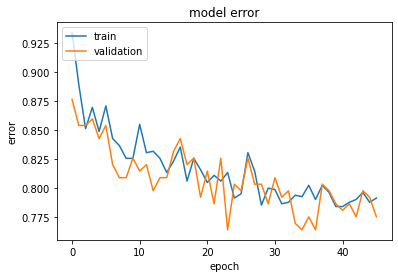

In [66]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    train_acc = hist.history["accuracy"]
    train_error = []
    for acc in train_acc:
      train_error.append(1 - acc)
    val_acc = hist.history["val_accuracy"]
    val_error = []
    for v_acc in val_acc:
      val_error.append(1 - v_acc)
    plt.plot(train_error, label='Training error')
    plt.plot(val_error, label = 'Validation error')
    plt.title("model error")
    plt.ylabel("error")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist_effnet)

Model Metrics: Precision, Recall, F-1 score

In [67]:
import sklearn
from sklearn import metrics
from tensorflow import metrics
import tensorflow_addons as tfa

y_true = test_ds_labels

precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
f1score = tfa.metrics.F1Score(num_classes=len(classes),average='macro',threshold=0.5)
pred = model_effnet.predict(test_data)
pred_out = np.zeros(pred.shape)
pred_out[np.arange(len(pred)),np.argmax(pred,axis=1)] = 1
pred_out
precision.update_state(pred_out,y_true)
recall.update_state(pred_out,y_true)
f1score.update_state(pred_out,y_true)
print("Precision: ",precision.result().numpy())
print("Recall: ", recall.result().numpy())
print("F-1 score:", f1score.result().numpy())

36/36 [==============================] - 5s 72ms/step
Precision:  0.050561797
Recall:  0.050561797
F-1 score: 0.0


**Model: VGG16**

In [68]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Model

def model_vgg16():
  num_classes = 20
  image_size = 224
  inputs = layers.Input(shape=(image_size, image_size, 3))
  img_augmentation = Sequential(
        [
            layers.RandomZoom(0.3),
            layers.RandomCrop(height= 50, width= 50),
            layers.RandomRotation(factor=0.15),
            layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
            layers.RandomFlip(),
            layers.RandomContrast(factor=0.1),
        ],
        name="img_augmentation",
    )
  x = img_augmentation(inputs)
  #freeze the top layers
  model = VGG16(include_top=False, input_tensor=x, weights= 'imagenet')
  model.trainable = False

  x = model.output
  x = Flatten(name="flatten")(x)
  x = layers.BatchNormalization()(x)
  #x = layers.BatchNormalization()(layer)
  #RELU activation function
  x = layers.Dense(512, activation="relu")(x)
  #20% dropout rate
  top_dropout_rate = 0.2
  x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
  #Softmax layer
  output_layer = layers.Dense(num_classes, activation='softmax', name="pred")(x)

  model_vgg = Model(inputs,output_layer)

  #optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
  #model_effnet.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
  return model_vgg

In [69]:
model_vgg = model_vgg16()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_vgg.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
hist_vgg = model_vgg.fit(train_data, epochs=50, callbacks= tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, mode = 'auto', restore_best_weights= True),validation_data=val_data, verbose=2)

Epoch 1/50
164/164 - 46s - loss: 3.1027 - accuracy: 0.1037 - val_loss: 4.0250 - val_accuracy: 0.1180 - 46s/epoch - 278ms/step
Epoch 2/50
164/164 - 38s - loss: 2.9513 - accuracy: 0.1317 - val_loss: 3.7287 - val_accuracy: 0.1461 - 38s/epoch - 234ms/step
Epoch 3/50
164/164 - 40s - loss: 2.9326 - accuracy: 0.1244 - val_loss: 3.5572 - val_accuracy: 0.1629 - 40s/epoch - 246ms/step
Epoch 4/50
164/164 - 38s - loss: 2.8446 - accuracy: 0.1488 - val_loss: 3.5933 - val_accuracy: 0.1910 - 38s/epoch - 232ms/step
Epoch 5/50
164/164 - 38s - loss: 2.7726 - accuracy: 0.1732 - val_loss: 3.8973 - val_accuracy: 0.1685 - 38s/epoch - 234ms/step
Epoch 6/50
164/164 - 38s - loss: 2.8271 - accuracy: 0.1537 - val_loss: 3.8743 - val_accuracy: 0.2022 - 38s/epoch - 235ms/step
Epoch 7/50
164/164 - 38s - loss: 2.7763 - accuracy: 0.1695 - val_loss: 3.9203 - val_accuracy: 0.1573 - 38s/epoch - 234ms/step
Epoch 8/50
164/164 - 38s - loss: 2.7017 - accuracy: 0.1939 - val_loss: 4.0413 - val_accuracy: 0.1573 - 38s/epoch - 234

Plot: Train error vs. Validation error

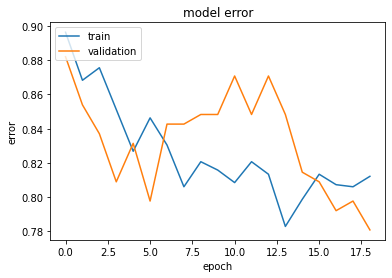

In [70]:
plot_hist(hist_vgg)

Model Metrics: Precision, Recall, F-1 Score

In [71]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
f1score = tfa.metrics.F1Score(num_classes=len(classes),average='macro',threshold=0.5)
pred = model_vgg.predict(test_data)
pred_out = np.zeros(pred.shape)
pred_out[np.arange(len(pred)),np.argmax(pred,axis=1)] = 1
pred_out
precision.update_state(pred_out,y_true)
recall.update_state(pred_out,y_true)
f1score.update_state(pred_out,y_true)
print("Precision: ",precision.result().numpy()) 
print("Recall ",recall.result().numpy())
print("F-1 Score:", f1score.result().numpy())

36/36 [==============================] - 7s 174ms/step
Precision:  0.050561797
Recall  0.050561797
F-1 Score: 0.0


Metrics: F1-score, precision, recall for each epoch

In [59]:
#https://www.kaggle.com/code/yasserhessein/alzheimer-s-classification-efficientnetb0

import keras.backend as K

def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

METRICS = [
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
        f1_score,
]

In [60]:
model_en_metrics = model_efficientnetb0()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_en_metrics.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics= METRICS)
hist_en_metrics = model_en_metrics.fit(train_data, epochs=50, validation_data=val_data, verbose=2)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 2, 2, 1280)       4049571   
                                                                 
 batch_normalization_16 (Bat  (None, 2, 2, 1280)       5120      
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 2, 2, 1280)        0         
                                                                 
 global_max_pooling2d_7 (Glo  (None, 1280)             0         
 balMaxPooling2D)                                                
                                                                 
 dropout_9 (Dropout)         (None, 1280)              0         
                                                                 
 dense_15 (Dense)            (None, 20)              

VGG16 Model metrics for every epoch

In [61]:
model_vgg_metrics = model_vgg16()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_vgg_metrics.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=METRICS)
hist_vgg_metrics = model_vgg_metrics.fit(train_data, epochs=50,validation_data=val_data, verbose=2)

Epoch 1/50
164/164 - 46s - loss: 3.0836 - precision: 0.3118 - recall: 0.0291 - f1_score: 0.0041 - val_loss: 4.2599 - val_precision: 0.1364 - val_recall: 0.0674 - val_f1_score: 0.0873 - 46s/epoch - 282ms/step
Epoch 2/50
164/164 - 36s - loss: 2.9341 - precision: 0.3333 - recall: 0.0268 - f1_score: 0.0422 - val_loss: 3.9318 - val_precision: 0.2198 - val_recall: 0.1124 - val_f1_score: 0.1422 - 36s/epoch - 218ms/step
Epoch 3/50
164/164 - 36s - loss: 2.8874 - precision: 0.3538 - recall: 0.0280 - f1_score: 0.0462 - val_loss: 3.8871 - val_precision: 0.1954 - val_recall: 0.0955 - val_f1_score: 0.1158 - 36s/epoch - 218ms/step
Epoch 4/50
164/164 - 36s - loss: 2.9585 - precision: 0.2267 - recall: 0.0207 - f1_score: 0.0319 - val_loss: 3.8255 - val_precision: 0.2405 - val_recall: 0.1067 - val_f1_score: 0.1294 - 36s/epoch - 217ms/step
Epoch 5/50
164/164 - 36s - loss: 2.8737 - precision: 0.2535 - recall: 0.0220 - f1_score: 0.0354 - val_loss: 4.1980 - val_precision: 0.2658 - val_recall: 0.1180 - val_f1

In [ ]:
#References:

#https://stackoverflow.com/questions/53074712/how-to-split-folder-of-images-into-test-training-validation-sets-with-stratified
#https://pypi.org/project/split-folders/
#https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/
#https://stackoverflow.com/questions/30230592/loading-all-images-using-imread-from-a-given-folder
#https://keras.io/
#https://keras.io/api/data_loading/
#https://stackoverflow.com/questions/69616500/keras-one-hot-for-labels-in-image-dataset-from-directory
#https://stackoverflow.com/questions/44887367/tensorflow-tf-one-hot-why-the-shape-of-output-is-defined-by-the-value-of-axis
#https://stackoverflow.com/questions/56226621/how-to-extract-data-labels-back-from-tensorflow-dataset
#https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/
#https://www.kaggle.com/code/yasserhessein/alzheimer-s-classification-efficientnetb0